In [1]:
import pandas as pd
import os
import sys
from datetime import datetime
import re

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
from plotnine import *

import numpy as np
import pandas as pd
#import patsy

#sklearn 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#to work on the X
#StandardScaler => standardize data (for categorical data)
#OneHotEncoder => creates dummies using categorical variables
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
#train_test_split => 
#KFold => more complex way to split training and test set: fit the model five times and then average the data
#gridsearch cross validation: to search a set of hyperparameters (the model will use some hyperparameters=> alpha on the regularisation part for example=> search through different para and get the best one)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
#import regression logistic and the one with some crossvalidation in it (LogisticRegressionCV)
from sklearn.pipeline import Pipeline
#like a box => quite graphical 
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
#metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('films2021_2022_clean.csv', encoding='utf-8-sig',sep=";")
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year,nomi,awards
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,bad,NaN,...,Anglais,0.0,0.0,0.0,87,5,mai,2023,0,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,soso,Robert Horn,...,Anglais,1.0,0.0,0.0,94,12,août,2022,0,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2",good,Philippe Lioret,...,Français,4.0,0.0,0.0,94,4,janvier,2023,1,0
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,soso,Julia Yorks,...,Anglais,0.0,0.0,0.0,100,15,juillet,2022,0,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,bad,Tomasz Mandes,...,Anglais,0.0,0.0,0.0,106,27,avril,2022,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Xtreme,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,soso,Iván Ledesma,...,Espagnol,0.0,0.0,0.0,111,4,juin,2021,0,0
2174,Yakuza Princess,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,soso,Vicente Amorim,...,Anglais,1.0,0.0,1.0,111,15,janvier,2022,0,0
2175,Yara,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,good,Graziano Diana,...,Italien,2.0,0.0,0.0,94,5,novembre,2021,0,0
2176,Yes Day,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,soso,Justin Malen,...,Anglais,10.0,1.0,2.0,86,12,mars,2021,0,0


In [3]:
df.note_spectators= df.note_spectators.replace({"catastrophic":0,"bad":0,"soso":0,"good":1,"excellent":1})

In [4]:
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year,nomi,awards
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,0,NaN,...,Anglais,0.0,0.0,0.0,87,5,mai,2023,0,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,0,Robert Horn,...,Anglais,1.0,0.0,0.0,94,12,août,2022,0,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2",1,Philippe Lioret,...,Français,4.0,0.0,0.0,94,4,janvier,2023,1,0
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,0,Julia Yorks,...,Anglais,0.0,0.0,0.0,100,15,juillet,2022,0,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,0,Tomasz Mandes,...,Anglais,0.0,0.0,0.0,106,27,avril,2022,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Xtreme,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,0,Iván Ledesma,...,Espagnol,0.0,0.0,0.0,111,4,juin,2021,0,0
2174,Yakuza Princess,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,0,Vicente Amorim,...,Anglais,1.0,0.0,1.0,111,15,janvier,2022,0,0
2175,Yara,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,1,Graziano Diana,...,Italien,2.0,0.0,0.0,94,5,novembre,2021,0,0
2176,Yes Day,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,0,Justin Malen,...,Anglais,10.0,1.0,2.0,86,12,mars,2021,0,0


In [5]:
df.isnull().sum()

Titre                     0
genre1                    0
genre2                  779
réalisateur_1             0
actor_1                   0
actor 2                   0
actor 3                  47
note_presse            1349
note_spectators           0
Scenar                  189
nationality_1             2
distributor            1077
language                  0
real awards               0
first actor awards        0
Second actor awards       0
length_corrected          0
day                       0
month                     0
year                      0
nomi                      0
awards                    0
dtype: int64

In [6]:
y=df['note_spectators'] #default y
X=df.drop(columns='note_spectators') #reste des données

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#it will be set to 0.25.for the test size and 75% for train if no value specified

In [8]:
y_train

30      0
1313    0
903     0
1121    1
1823    0
       ..
1638    0
1095    1
1130    0
1294    1
860     0
Name: note_spectators, Length: 1633, dtype: int64

In [9]:
y_test

282     1
479     0
1307    1
1254    0
507     0
       ..
436     0
1106    0
393     1
674     0
534     1
Name: note_spectators, Length: 545, dtype: int64

In [10]:
print("--- Total ---")
print(y.value_counts(normalize=True))
#normalize = True => en %
print("--- Train ---")
print(y_train.value_counts(normalize=True))
print("--- Test ---")
print(y_test.value_counts(normalize=True))

--- Total ---
0    0.608356
1    0.391644
Name: note_spectators, dtype: float64
--- Train ---
0    0.605021
1    0.394979
Name: note_spectators, dtype: float64
--- Test ---
0    0.618349
1    0.381651
Name: note_spectators, dtype: float64


In [11]:
df.columns

Index(['Titre', 'genre1', 'genre2', 'réalisateur_1', 'actor_1', 'actor 2',
       'actor 3', 'note_presse', 'note_spectators', 'Scenar', 'nationality_1',
       'distributor', 'language', 'real awards', 'first actor awards',
       'Second actor awards', 'length_corrected', 'day', 'month', 'year',
       'nomi', 'awards'],
      dtype='object')

In [12]:
#We have different types of variables
#I list variables in function of what they correspond to
film = ["Titre", "genre1",'genre2','note_presse', "nationality_1","language","length_corrected","day","month","nomi","year"]

In [13]:
#Related to actors
actors = [
    "actor_1",
    "actor 2",
    'actor 3',
    "first actor awards",
    "Second actor awards",
]
#Related to director and writer
director = [
    "réalisateur_1",
    'real awards',
    'distributor',
    'Scenar',
]

In [14]:
M2= ["actor_1","length_corrected","nationality_1","language","genre1","réalisateur_1","first actor awards", "nomi"]

In [15]:
X_train_M2=X_train[M2]
X_test_M2 =X_test[M2]

In [16]:
k = KFold(n_splits=3, shuffle=True, random_state=42)
#cross validation function: 

In [17]:
C_value_logit = [1e20]
#the fact that I don't want regularisation => C= 1/lambda => here really small lambda => regularisation =0
#C is a hyperparameter of the logistic function 

In [18]:
#2 dictionaries to keep the performancies
test_accuracy={}
test_auc_roc={}

### Model 1: Logit
#### Set up Logit model object

In [19]:
logistic = LogisticRegressionCV(
    Cs=C_value_logit,#I have no regularisation
    cv=k, #how I want to do cross-validation
    refit=True,
    solver='newton-cg' ,
    tol=1e-7,
    random_state=42,
)
#I precise lots of the hyperparameters

In [20]:
logi = LogisticRegression(
    solver='liblinear',
    random_state=42,
)

In [21]:
from sklearn.compose import make_column_selector as selector
#how I will handle the categorical and numerical vraiables
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X_train_M2)
categorical_columns

['actor_1', 'nationality_1', 'language', 'genre1', 'réalisateur_1']

In [22]:
categorical_transformer= Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))]

)

In [23]:
numeric_columns = [col for col in X_train_M2.columns if col not in categorical_columns]
numeric_columns

['length_corrected', 'first actor awards', 'nomi']

In [24]:
numeric_transformer= Pipeline(
    steps=[("scaler", StandardScaler())]
)
numeric_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [25]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns),    
]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['length_corrected', 'first actor awards',
                                  'nomi']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['actor_1', 'nationality_1', 'language',
                                  'genre1', 'réalisateur_1'])])

##### The pipeline:

In [26]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
pipeline_logi_M2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logi)]
)
pipeline_logi_M2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first actor awards',
                                                   'nomi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
          

In [27]:
pipeline_logi_M2.fit(X_train_M2, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first actor awards',
                                                   'nomi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
          

In [44]:
y_test_hat = pipeline_logi_M2.predict(X_test_M2)
y_test_hat_probs = pipeline_logi_M2.predict_proba(X_test_M2)[:,1]

test_accuracy['logi_m2'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['logi_m2'] = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc['logit_m2'])
print('Testing accuracy: %.4f %%' % test_accuracy['logi_m2']) 

Confusion matrix:
 [[283  54]
 [ 97 111]]
Testing AUC: 65.9289 %
Testing accuracy: 72.2936 %


## With LogisticRegressionCV

In [45]:
k = KFold(n_splits=5, shuffle=True, random_state=42)
#cross validation function: 

In [46]:
C_value_logit = [1e20]
#the fact that I don't want regularisation => C= 1/lambda => here really small lambda => regularisation =0
#C is a hyperparameter of the logistic function

In [47]:
logistic = LogisticRegressionCV(
    Cs=C_value_logit,#I have no regularisation
    cv=k, #how I want to do cross-validation
    refit=True,
    solver='newton-cg' ,
    tol=1e-7,
    random_state=30,
)
#I precise lots of the hyperparameters

In [48]:
pipeline_logit_M2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logistic)]
)
pipeline_logit_M2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first actor awards',
                                                   'nomi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
          

In [49]:
pipeline_logit_M2.fit(X_train_M2, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first actor awards',
                                                   'nomi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
          

In [50]:
y_test_hat = pipeline_logit_M2.predict(X_test_M2)
y_test_hat_probs = pipeline_logit_M2.predict_proba(X_test_M2)[:,1]

test_accuracy['logit_m2'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['logit_m2'] = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc['logit_m2'])
print('Testing accuracy: %.4f %%' % test_accuracy['logit_m2']) 

Confusion matrix:
 [[241  96]
 [ 91 117]]
Testing AUC: 65.9289 %
Testing accuracy: 65.6881 %


### Lasso

In [51]:
lambdas = list(10 ** np.arange(-1, -4.01, -1 / 3))
n_obs = X_train_M2.shape[0] * 4 / 5
C_values = [
    1 / (l * n_obs) for l in lambdas
]  # Cs are the inverse of regularization strength
len(C_values)

10

In [52]:
logistic_lasso = LogisticRegressionCV(
    Cs=C_values,
    penalty="l1", # L1 regularization = lasso 
    cv=k,
    refit=True,
    scoring="roc_auc",
    solver="liblinear",
    random_state=24,
)


In [53]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
pipeline_logistic_lasso = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", logistic_lasso)]
)
pipeline_logistic_lasso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first actor awards',
                                                   'nomi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
          

In [54]:
logLasso=pipeline_logistic_lasso.fit(X_train_M2, y_train)
logLasso

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first actor awards',
                                                   'nomi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
          

In [55]:
y_test_hat = pipeline_logistic_lasso.predict(X_test_M2)
y_test_hat_probs = pipeline_logistic_lasso.predict_proba(X_test_M2)[:,1]

test_accuracy['logit_m2'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['logit_m2'] = roc_auc_score(y_test, y_test_hat_probs, multi_class='ovr')*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing AUC: %.4f %%' % test_auc_roc['logit_m2'])
print('Testing accuracy: %.4f %%' % test_accuracy['logit_m2']) 

Confusion matrix:
 [[279  58]
 [ 96 112]]
Testing AUC: 75.2689 %
Testing accuracy: 71.7431 %


In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
scores = cross_val_score(pipeline_logistic_lasso, X_train_M2, y_train, cv = k)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


In [58]:
y_test_hat = pipeline_logistic_lasso.predict(X_test_M2)
y_test_hat_probs = pipeline_logistic_lasso.predict_proba(X_test_M2)[:,1]

In [59]:
test_accuracy['logistic_lasso'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['logistic_lasso'] = roc_auc_score(y_test, y_test_hat_probs,multi_class="ovo")*100

In [60]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_hat_probs)
roc_auc = metrics.auc(fpr, tpr)
threshold

array([1.98845812, 0.98845812, 0.91328764, 0.88631582, 0.85822602,
       0.85218217, 0.84576244, 0.8453471 , 0.76297535, 0.75981599,
       0.72973627, 0.72923786, 0.72072051, 0.7196379 , 0.69997883,
       0.69758112, 0.69606859, 0.69502123, 0.68441433, 0.67773991,
       0.67216026, 0.67044648, 0.66779164, 0.66770288, 0.66084295,
       0.65862715, 0.64261506, 0.64243373, 0.63926234, 0.63757443,
       0.6368168 , 0.63184608, 0.63155067, 0.63105594, 0.61467019,
       0.61164102, 0.59190867, 0.59018442, 0.58766265, 0.58750635,
       0.58573639, 0.5813535 , 0.57899382, 0.57816706, 0.57771767,
       0.57515432, 0.57012622, 0.56958182, 0.56377172, 0.56352316,
       0.54679274, 0.5461465 , 0.54557322, 0.54275592, 0.52859749,
       0.52480299, 0.5219668 , 0.52058673, 0.5191897 , 0.51764819,
       0.51350818, 0.51298971, 0.51047213, 0.50786445, 0.50730933,
       0.5067542 , 0.50554381, 0.49951051, 0.48778552, 0.48371269,
       0.48357803, 0.48236853, 0.48131451, 0.48077794, 0.47526

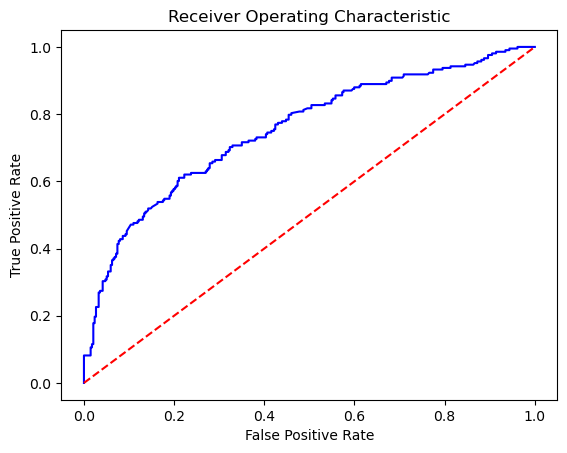

In [61]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBOOST

In [65]:
import xgboost as xgb

In [66]:
xgb_model = xgb.XGBClassifier(objective="reg:squarederror", random_state=42)

In [67]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
pipeline_xgp = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", xgb_model)]
)
pipeline_xgp

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first actor awards',
                                                   'nomi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
          

In [68]:
model_xgb=pipeline_xgp.fit(X_train_M2, y_train)
model_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first actor awards',
                                                   'nomi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
          

In [69]:
y_test_hat = model_xgb.predict(X_test_M2)
y_test_hat_probs = model_xgb.predict_proba(X_test_M2)[:,1]

In [70]:
test_accuracy['xgb'] = accuracy_score(y_test, y_test_hat)*100
test_auc_roc['xgb'] = roc_auc_score(y_test, y_test_hat_probs)*100

## Comparing the different models

In [71]:
test_auc_roc

{'logit_m2': 75.2689169139466,
 'logi_m2': 76.40521570417714,
 'logistic_lasso': 75.2689169139466,
 'xgb': 73.70962679753481}

In [72]:
test_accuracy

{'logi_m2': 72.29357798165138,
 'logit_m2': 71.74311926605505,
 'logistic_lasso': 71.74311926605505,
 'xgb': 70.45871559633028}

## Test on another dataset